## Library specification

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb

from matplotlib import pyplot as mp
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/garim/Desktop/Project/recession/final/Final5.csv')
df.head()

,Date,Recession1,Recession6,Recession12,3MoTBill,6MoTBill,1YoTBill,5YoTBill,10YoTBill,Unrate,...,T5YFFM_12MoLag,T10YFFM_3MoLag,T10YFFM_6MoLag,T10YFFM_12MoLag,CPIAUCSL_3MoLag,CPIAUCSL_6MoLag,CPIAUCSL_12MoLag,SandP500_3MoLag,SandP500_6MoLag,SandP500_12MoLag
0,01-01-1960,0.0,0.0,1.0,-0.042896,0.036940,0.011433,-0.240328,-0.437317,-0.467681,...,0.590077,-0.310243,-0.075010,0.297894,-1.309224,-1.310099,-1.308867,-0.842144,-0.839951,-0.852184
1,02-01-1960,0.0,1.0,1.0,-0.167144,-0.103765,-0.099354,-0.314968,-0.517117,-0.708455,...,0.590077,-0.322673,-0.075010,0.291707,-1.309224,-1.309698,-1.309002,-0.841157,-0.841153,-0.852239
2,03-01-1960,0.0,1.0,1.0,-0.374222,-0.324416,-0.290985,-0.438287,-0.600386,-0.347295,...,0.336898,-0.217021,-0.081213,0.081379,-1.308425,-1.308762,-1.309406,-0.839066,-0.844745,-0.852198
3,04-01-1960,1.0,1.0,1.0,-0.399709,-0.343603,-0.284997,-0.444778,-0.589977,-0.467681,...,0.314559,-0.198377,-0.310726,0.062820,-1.308958,-1.307426,-1.309272,-0.844624,-0.843900,-0.849251
4,05-01-1960,1.0,1.0,1.0,-0.380594,-0.334009,-0.234095,-0.379873,-0.565690,-0.527875,...,0.530506,-0.328888,-0.323132,0.217474,-1.308425,-1.307426,-1.308463,-0.843962,-0.842896,-0.847758


In [3]:
df=df.drop([725,726,727,728],axis=0)

# #1 Month ahead prediction performance

In [4]:
df1=df
df1.shape

(725, 69)

In [5]:

X=df1[['3MoTBill','6MoTBill',	'1YoTBill',	'5YoTBill',	'10YoTBill',	
       'Unrate','consumptionex',	'indpro',	'fedfunrate',	
       'TB3SMFFM','TB6SMFFM',	'T1YFFM',	'T5YFFM',	'T10YFFM',	
       'CPIAUCSL',	'SandP500',	'Recession',	'3MoTBill_3MoLag',	
       '3MoTBill_6MoLag',	'3MoTBill_12MoLag',	'6MoTBill_3MoLag',	
       '6MoTBill_6MoLag',	'6MoTBill_12MoLag',	'1YoTBill_3MoLag',	
       '1YoTBill_6MoLag',	'1YoTBill_12MoLag',	'5YoTBill_3MoLag',	'5YoTBill_6MoLag',
       '5YoTBill_12MoLag',	'10YoTBill_3MoLag',	'10YoTBill_6MoLag',	'10YoTBill_12MoLag',
       'Unrate_3MoLag',	'Unrate_6MoLag',	'Unrate_12MoLag',	'consumptionex_3MoLag',	
       'consumptionex_6MoLag',	'consumptionex_12MoLag',	'indpro_3MoLag',
       'indpro_6MoLag',	'indpro_12MoLag',	'fedfunrate_3MoLag',	'fedfunrate_6MoLag',
       'fedfunrate_12MoLag',	'TB3SMFFM_3MoLag',	'TB3SMFFM_6MoLag',	'TB3SMFFM_12MoLag',
       'TB6SMFFM_3MoLag',	'TB6SMFFM_6MoLag',	'TB6SMFFM_12MoLag',	'T1YFFM_3MoLag',
       'T1YFFM_6MoLag',	'T1YFFM_12MoLag',	'T5YFFM_3MoLag',	'T5YFFM_6MoLag',
       'T5YFFM_12MoLag',	'T10YFFM_3MoLag',	'T10YFFM_6MoLag',	'T10YFFM_12MoLag',	'CPIAUCSL_3MoLag',
       'CPIAUCSL_6MoLag',	'CPIAUCSL_12MoLag',	'SandP500_3MoLag',	'SandP500_6MoLag',	'SandP500_12MoLag']].values
Y=df1['Recession1'].values

X_train = X[:579]
Y_train = Y[:579]

X_val = X[579:]
Y_val =Y[579:]

X_val.shape



(146, 65)

In [6]:
model1=SVC(probability=True)# high penalty 
SV1=model1.fit(X_train,Y_train)
trainPred1=SV1.predict(X_val)
prob_predictions1 = np.append(SV1.predict_proba(X_train), SV1.predict_proba(X_val), axis=0)

In [7]:
model2=KNeighborsClassifier()# high penalty 
KNN2=model2.fit(X_train,Y_train)
trainPred2=KNN2.predict(X_val)
prob_predictions2 = np.append(KNN2.predict_proba(X_train), KNN2.predict_proba(X_val), axis=0)

In [8]:
model3=RandomForestClassifier()# high penalty 
RF3=model3.fit(X_train,Y_train)
trainPred3=RF3.predict(X_val)
prob_predictions3 = np.append(RF3.predict_proba(X_train), RF3.predict_proba(X_val), axis=0)

In [9]:
df['Recession1'].shape

(725,)

Plot

In [10]:
df_date_test=df1['Date'].values
df_date_test.shape

(725,)

In [11]:
df_date_test=df1['Date'].values

data = pd.DataFrame({'Date':df_date_test,'Recession':df['Recession1'],'SVM': prob_predictions1[:,1],'KNN':prob_predictions2[:,1],'RF':prob_predictions3[:,1]})



#output1monthRF.to_csv('C:/Users/garim/Desktop/Project/ResultPics/predicted data/1 Month RF Pred.csv', index=False)

In [12]:
data['Date'] = pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 725 entries, 1960-01-01 to 2020-05-01
Data columns (total 4 columns):
Recession    725 non-null float64
SVM          725 non-null float64
KNN          725 non-null float64
RF           725 non-null float64
dtypes: float64(4)
memory usage: 28.3 KB


In [13]:
recs = data.query('Recession==1.0')
recs_1 = recs.loc['1960':'1961']
recs_2 = recs.loc['1969':'1970']
recs_3 = recs.loc['1973':'1975']
recs_4 = recs.loc['1980']
recs_5 = recs.loc['1981':'1982']
recs_6 = recs.loc['1990':'1991']
recs_7 = recs.loc['2001']
recs_8 = recs.loc['2007':'2009']
recs_9 = recs.loc['2020':]

recs1_bgn = recs_1.index[0]
recs1_end = recs_1.index[-1]
recs2_bgn = recs_2.index[0]
recs2_end = recs_2.index[-1]
recs3_bgn = recs_3.index[0]
recs3_end = recs_3.index[-1]
recs4_bgn = recs_4.index[0]
recs4_end = recs_4.index[-1]
recs5_bgn = recs_5.index[0]
recs5_end = recs_5.index[-1]
recs6_bgn = recs_6.index[0]
recs6_end = recs_6.index[-1]
recs7_bgn = recs_7.index[0]
recs7_end = recs_7.index[-1]
recs8_bgn = recs_8.index[0]
recs8_end = recs_8.index[-1]
recs9_bgn = recs_9.index[0]
recs9_end = recs_9.index[-1]

<module 'matplotlib.pyplot' from 'C:\\Users\\garim\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


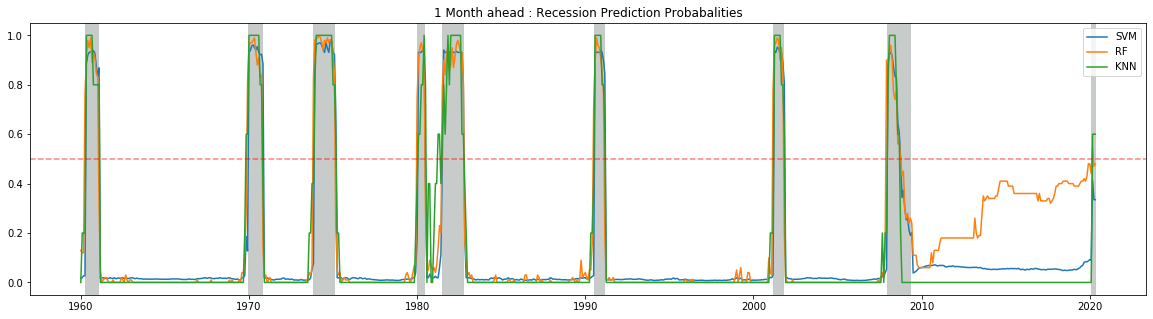

In [14]:
plot_cols = ['SVM', 'RF','KNN']

# 2 axes for 2 subplots
plt.figure(figsize=(20,5))
plt.plot(data['SVM'],label = "SVM")
plt.plot(data['RF'],label = "RF")
plt.plot(data['KNN'],label = "KNN")
print(plt)
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  
plt.title('1 Month ahead : Recession Prediction Probabalities')

for i in range(9):
    plt.axvspan(recs1_bgn, recs1_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs2_bgn, recs2_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs3_bgn, recs3_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs4_bgn, recs4_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs5_bgn, recs5_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs6_bgn, recs6_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs7_bgn, recs7_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs8_bgn, recs8_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs9_bgn, recs9_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
plt.legend()


plt.show()   


In [15]:
from sklearn.metrics import confusion_matrix

cf1RF=confusion_matrix(Y_val,trainPred3)


cf1SVC=confusion_matrix(Y_val,trainPred1)


cf1KNN=confusion_matrix(Y_val,trainPred2)

print("Random forest \n",cf1RF)
print("SVM \n",cf1SVC)
print("KNN \n",cf1KNN)




Random forest 
 [[128   0]
 [ 11   7]]
SVM 
 [[128   0]
 [  8  10]]
KNN 
 [[128   0]
 [  9   9]]


## 3 Month ahead prediction performance

In [16]:
df3=df
df3=df3.drop([723,724],axis=0)

In [17]:

X=df3[['3MoTBill','6MoTBill',	'1YoTBill',	'5YoTBill',	'10YoTBill',	
       'Unrate','consumptionex',	'indpro',	'fedfunrate',	
       'TB3SMFFM','TB6SMFFM',	'T1YFFM',	'T5YFFM',	'T10YFFM',	
       'CPIAUCSL',	'SandP500',	'Recession',	'3MoTBill_3MoLag',	
       '3MoTBill_6MoLag',	'3MoTBill_12MoLag',	'6MoTBill_3MoLag',	
       '6MoTBill_6MoLag',	'6MoTBill_12MoLag',	'1YoTBill_3MoLag',	
       '1YoTBill_6MoLag',	'1YoTBill_12MoLag',	'5YoTBill_3MoLag',	'5YoTBill_6MoLag',
       '5YoTBill_12MoLag',	'10YoTBill_3MoLag',	'10YoTBill_6MoLag',	'10YoTBill_12MoLag',
       'Unrate_3MoLag',	'Unrate_6MoLag',	'Unrate_12MoLag',	'consumptionex_3MoLag',	
       'consumptionex_6MoLag',	'consumptionex_12MoLag',	'indpro_3MoLag',
       'indpro_6MoLag',	'indpro_12MoLag',	'fedfunrate_3MoLag',	'fedfunrate_6MoLag',
       'fedfunrate_12MoLag',	'TB3SMFFM_3MoLag',	'TB3SMFFM_6MoLag',	'TB3SMFFM_12MoLag',
       'TB6SMFFM_3MoLag',	'TB6SMFFM_6MoLag',	'TB6SMFFM_12MoLag',	'T1YFFM_3MoLag',
       'T1YFFM_6MoLag',	'T1YFFM_12MoLag',	'T5YFFM_3MoLag',	'T5YFFM_6MoLag',
       'T5YFFM_12MoLag',	'T10YFFM_3MoLag',	'T10YFFM_6MoLag',	'T10YFFM_12MoLag',	'CPIAUCSL_3MoLag',
       'CPIAUCSL_6MoLag',	'CPIAUCSL_12MoLag',	'SandP500_3MoLag',	'SandP500_6MoLag',	'SandP500_12MoLag']].values
Y=df3['Recession6'].values

X_train = X[:579]
Y_train = Y[:579]

X_val = X[579:]
Y_val =Y[579:]

X_val.shape



(144, 65)

In [18]:
model4=SVC(probability=True)# high penalty 
SV4=model4.fit(X_train,Y_train)
trainPred4=SV4.predict(X_val)
prob_predictions4 = np.append(SV4.predict_proba(X_train), SV4.predict_proba(X_val), axis=0)

model5=KNeighborsClassifier()# high penalty 
KNN5=model5.fit(X_train,Y_train)
trainPred5=KNN5.predict(X_val)
prob_predictions5 = np.append(KNN5.predict_proba(X_train), KNN5.predict_proba(X_val), axis=0)

model6=RandomForestClassifier()# high penalty 
RF6=model6.fit(X_train,Y_train)
trainPred6=RF6.predict(X_val)
prob_predictions6 = np.append(RF6.predict_proba(X_train), RF6.predict_proba(X_val), axis=0)

In [19]:
df_date_test2=df3['Date'].values
df_date_test2.shape

df_date_test2=df3['Date'].values

data2 = pd.DataFrame({'Date':df_date_test2,'Recession':df3['Recession6'],'SVM': prob_predictions4[:,1],'KNN':prob_predictions5[:,1],'RF':prob_predictions6[:,1]})

data2['Date'] = pd.to_datetime(data2['Date']) 
data2.set_index('Date', inplace=True) 
data2.info()

#output1monthRF.to_csv('C:/Users/garim/Desktop/Project/ResultPics/predicted data/1 Month RF Pred.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723 entries, 1960-01-01 to 2020-03-01
Data columns (total 4 columns):
Recession    723 non-null float64
SVM          723 non-null float64
KNN          723 non-null float64
RF           723 non-null float64
dtypes: float64(4)
memory usage: 28.2 KB


In [20]:
recs = data2.query('Recession==1.0')
recs_1 = recs.loc['1960':'1961']
recs_2 = recs.loc['1969':'1970']
recs_3 = recs.loc['1973':'1975']
recs_4 = recs.loc['1980']
recs_5 = recs.loc['1981':'1982']
recs_6 = recs.loc['1990':'1991']
recs_7 = recs.loc['2001']
recs_8 = recs.loc['2007':'2009']
recs_9 = recs.loc['2020':]

recs1_bgn = recs_1.index[0]
recs1_end = recs_1.index[-1]
recs2_bgn = recs_2.index[0]
recs2_end = recs_2.index[-1]
recs3_bgn = recs_3.index[0]
recs3_end = recs_3.index[-1]
recs4_bgn = recs_4.index[0]
recs4_end = recs_4.index[-1]
recs5_bgn = recs_5.index[0]
recs5_end = recs_5.index[-1]
recs6_bgn = recs_6.index[0]
recs6_end = recs_6.index[-1]
recs7_bgn = recs_7.index[0]
recs7_end = recs_7.index[-1]
recs8_bgn = recs_8.index[0]
recs8_end = recs_8.index[-1]
recs9_bgn = recs_9.index[0]
recs9_end = recs_9.index[-1]

<module 'matplotlib.pyplot' from 'C:\\Users\\garim\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


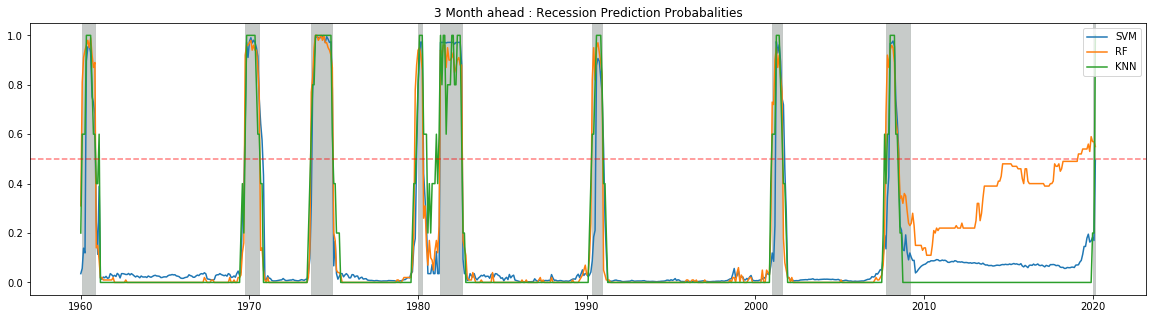

In [21]:
plot_cols = ['SVM', 'RF','KNN']

# 2 axes for 2 subplots
plt.figure(figsize=(20,5))
plt.plot(data2['SVM'],label = "SVM")
plt.plot(data2['RF'],label = "RF")
plt.plot(data2['KNN'],label = "KNN")
print(plt)
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  
plt.title('3 Month ahead : Recession Prediction Probabalities')

for i in range(9):
    plt.axvspan(recs1_bgn, recs1_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs2_bgn, recs2_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs3_bgn, recs3_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs4_bgn, recs4_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs5_bgn, recs5_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs6_bgn, recs6_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs7_bgn, recs7_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs8_bgn, recs8_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs9_bgn, recs9_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
plt.legend()


plt.show()   


In [22]:
cf1SVC=confusion_matrix(Y_val,trainPred4)


cf1KNN=confusion_matrix(Y_val,trainPred5)

cf1RF=confusion_matrix(Y_val,trainPred6)

print("Random forest \n",cf1RF)
print("SVM \n",cf1SVC)
print("KNN \n",cf1KNN)

Random forest 
 [[119   9]
 [  8   8]]
SVM 
 [[128   0]
 [ 12   4]]
KNN 
 [[128   0]
 [ 12   4]]


## 6 Month ahead prediction performance

In [23]:
df6=df
df6=df6.drop(df.index[720: ],axis=0)


In [24]:

X=df6[['3MoTBill','6MoTBill',	'1YoTBill',	'5YoTBill',	'10YoTBill',	
       'Unrate','consumptionex',	'indpro',	'fedfunrate',	
       'TB3SMFFM','TB6SMFFM',	'T1YFFM',	'T5YFFM',	'T10YFFM',	
       'CPIAUCSL',	'SandP500',	'Recession',	'3MoTBill_3MoLag',	
       '3MoTBill_6MoLag',	'3MoTBill_12MoLag',	'6MoTBill_3MoLag',	
       '6MoTBill_6MoLag',	'6MoTBill_12MoLag',	'1YoTBill_3MoLag',	
       '1YoTBill_6MoLag',	'1YoTBill_12MoLag',	'5YoTBill_3MoLag',	'5YoTBill_6MoLag',
       '5YoTBill_12MoLag',	'10YoTBill_3MoLag',	'10YoTBill_6MoLag',	'10YoTBill_12MoLag',
       'Unrate_3MoLag',	'Unrate_6MoLag',	'Unrate_12MoLag',	'consumptionex_3MoLag',	
       'consumptionex_6MoLag',	'consumptionex_12MoLag',	'indpro_3MoLag',
       'indpro_6MoLag',	'indpro_12MoLag',	'fedfunrate_3MoLag',	'fedfunrate_6MoLag',
       'fedfunrate_12MoLag',	'TB3SMFFM_3MoLag',	'TB3SMFFM_6MoLag',	'TB3SMFFM_12MoLag',
       'TB6SMFFM_3MoLag',	'TB6SMFFM_6MoLag',	'TB6SMFFM_12MoLag',	'T1YFFM_3MoLag',
       'T1YFFM_6MoLag',	'T1YFFM_12MoLag',	'T5YFFM_3MoLag',	'T5YFFM_6MoLag',
       'T5YFFM_12MoLag',	'T10YFFM_3MoLag',	'T10YFFM_6MoLag',	'T10YFFM_12MoLag',	'CPIAUCSL_3MoLag',
       'CPIAUCSL_6MoLag',	'CPIAUCSL_12MoLag',	'SandP500_3MoLag',	'SandP500_6MoLag',	'SandP500_12MoLag']].values
Y=df6['Recession12'].values

X_train = X[:579]
Y_train = Y[:579]

X_val = X[579:]
Y_val =Y[579:]

X_val.shape



(141, 65)

In [25]:
model7=SVC(probability=True)# high penalty 
SV7=model7.fit(X_train,Y_train)
trainPred7=SV7.predict(X_val)
prob_predictions7 = np.append(SV7.predict_proba(X_train), SV7.predict_proba(X_val), axis=0)

model8=KNeighborsClassifier()# high penalty 
KNN8=model8.fit(X_train,Y_train)
trainPred8=KNN8.predict(X_val)
prob_predictions8 = np.append(KNN8.predict_proba(X_train), KNN8.predict_proba(X_val), axis=0)

model9=RandomForestClassifier()# high penalty 
RF9=model9.fit(X_train,Y_train)
trainPred9=RF9.predict(X_val)
prob_predictions9 = np.append(RF9.predict_proba(X_train), RF9.predict_proba(X_val), axis=0)

In [26]:
df_date_test3=df6['Date'].values
df_date_test3.shape

df_date_test3=df6['Date'].values

data3 = pd.DataFrame({'Date':df_date_test3,'Recession':df6['Recession12'],'SVM': prob_predictions7[:,1],'KNN':prob_predictions8[:,1],'RF':prob_predictions9[:,1]})

data3['Date'] = pd.to_datetime(data3['Date']) 
data3.set_index('Date', inplace=True) 
data3.info()

#output1monthRF.to_csv('C:/Users/garim/Desktop/Project/ResultPics/predicted data/1 Month RF Pred.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 1960-01-01 to 2019-12-01
Data columns (total 4 columns):
Recession    720 non-null float64
SVM          720 non-null float64
KNN          720 non-null float64
RF           720 non-null float64
dtypes: float64(4)
memory usage: 28.1 KB


In [27]:
recs = data2.query('Recession==1.0')
recs_1 = recs.loc['1960':'1961']
recs_2 = recs.loc['1969':'1970']
recs_3 = recs.loc['1973':'1975']
recs_4 = recs.loc['1980']
recs_5 = recs.loc['1981':'1982']
recs_6 = recs.loc['1990':'1991']
recs_7 = recs.loc['2001']
recs_8 = recs.loc['2007':'2009']
recs_9 = recs.loc['2020':]

recs1_bgn = recs_1.index[0]
recs1_end = recs_1.index[-1]
recs2_bgn = recs_2.index[0]
recs2_end = recs_2.index[-1]
recs3_bgn = recs_3.index[0]
recs3_end = recs_3.index[-1]
recs4_bgn = recs_4.index[0]
recs4_end = recs_4.index[-1]
recs5_bgn = recs_5.index[0]
recs5_end = recs_5.index[-1]
recs6_bgn = recs_6.index[0]
recs6_end = recs_6.index[-1]
recs7_bgn = recs_7.index[0]
recs7_end = recs_7.index[-1]
recs8_bgn = recs_8.index[0]
recs8_end = recs_8.index[-1]
recs9_bgn = recs_9.index[0]
recs9_end = recs_9.index[-1]

<module 'matplotlib.pyplot' from 'C:\\Users\\garim\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


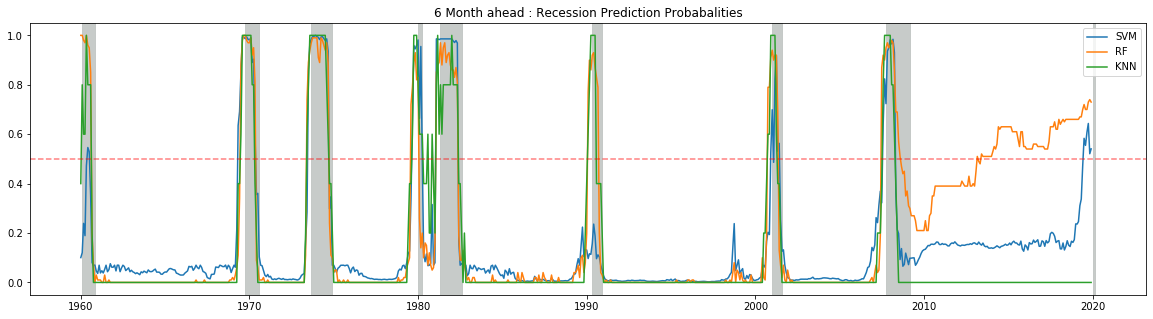

In [28]:
plot_cols = ['SVM', 'RF','KNN']

# 2 axes for 2 subplots
plt.figure(figsize=(20,5))
plt.plot(data3['SVM'],label = "SVM")
plt.plot(data3['RF'],label = "RF")
plt.plot(data3['KNN'],label = "KNN")
print(plt)
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  
plt.title('6 Month ahead : Recession Prediction Probabalities')

for i in range(9):
    plt.axvspan(recs1_bgn, recs1_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs2_bgn, recs2_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs3_bgn, recs3_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs4_bgn, recs4_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs5_bgn, recs5_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs6_bgn, recs6_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs7_bgn, recs7_end, color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs8_bgn, recs8_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
    plt.axvspan(recs9_bgn, recs9_end,  color=sns.xkcd_rgb['silver'], alpha=0.25)
plt.legend()


plt.show()   


In [126]:
cf1SVC=confusion_matrix(Y_val,trainPred7)

cf1KNN=confusion_matrix(Y_val,trainPred8)
cf1RF=confusion_matrix(Y_val,trainPred9)

print("Random forest \n",cf1RF)
print("SVM \n",cf1SVC)
print("KNN \n",cf1KNN)

Random forest 
 [[52 76]
 [ 6  7]]
SVM 
 [[128   0]
 [ 12   1]]
KNN 
 [[128   0]
 [ 12   1]]
